# Predicting heart disease using machine learning

**Objective:** To build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


**Approach:**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original Heart Disease Dataset comes from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/45/heart+disease

Another Heart Disease Classification Dataset version from Kaggle:
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features

**Data Dictionary**

* **age:** Displays the age of the individual.


* **sex:**
    * 1 = male
    * 0 = female


* **cp** - Chest-pain type: displays the type of chest-pain experienced by the individual
    * 0 = Typical angina: chest pain related decrease blood supply to the heart
    * 1 = Atypical angina: chest pain not related to heart
    * 2 = Non-anginal pain: typically esophageal spasms (non heart related)
    * 3 = Asymptomatic: chest pain not showing signs of disease


* **trestbps** - Resting Blood Pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.


* **chol** - Serum cholestoral in mg/dl.
    * Serum = LDL + HDL + .2 * triglycerides
    * Above 200 is cause for concern


* **fbs** - Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    * 1 (true)
    * 0 (false)
    * '>126' mg/dL signals diabetes


* **restecg** - Resting electrocardiographic results.
    * 0 = normal 
    * 1 = having ST-T wave abnormality
    * 2 = left ventricular hyperthrophy


* **thalach** - Maximum heart rate achieved.


* **exang** - Exercise induced angina.
    * 1 = yes
    * 0 = no


* **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more.


* **slope** - The slope of the peak exercise ST segment
    * 0 = upsloping: better heart rate with excercise (uncommon)
    * 1 = flat: minimal change (typical healthy heart)
    * 2 = downsloping: signs of unhealthy heart


* **ca** - Number of major vessels (0–3) colored by flourosopy.
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)


* **thal**: Displays the thalassemia
    * 1,3 = normal
    * 6 = fixed defect
    * 7 = reversible defect: no proper blood movement when excercising


* **target**: Displays whether the individual is suffering from heart disease or not.
    * 1 = yes
    * 0 = no

## Set the stage

Import libraries:

* `pandas`: Used for data manipulation.
* `matplotlib.pyplot`: Used for plotting data.
* `numpy`: Performs mathematical operations on large arrays of matrices.
* `seaborn`: Data visualization library (statistical graphics) based on matplotlib.
* `%matplotlib inline`: The plots to appear inside the notebook.

In [85]:
# Regular EDA and plotting libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

## Load the data

In [6]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

303 rows, and 14 columns

## Exploratory Data Analysis


1. What kind of data do we have and how do we treat different types?
2. What's missing from the data? - how do we deal with it?
3. Where are the outliers?
4. How to add, change or remove features to get more of the data?

In [8]:
# How many of each class from the target column?
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* 165 patients with heart disease.
* 138 examples of patiens who doesn't have heart disease.

This is a balanced classification problem - we have similar amount of examples in both classess.

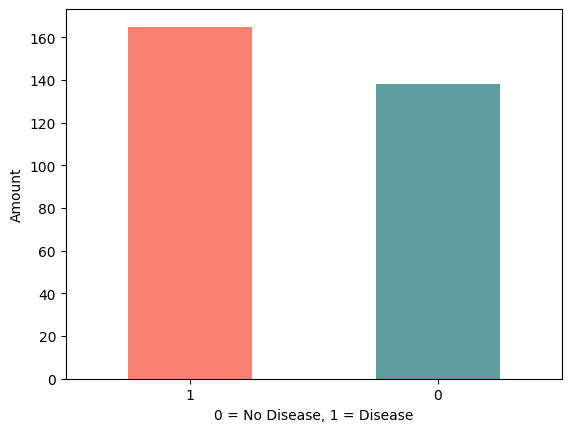

In [23]:
df["target"].value_counts().plot(kind="bar",
                                 color=["salmon", "cadetblue"]);

plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [10]:
# Get a quick insight into the number of missing values and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Show a range of metrics from the numerical columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing Features:
### Heart Disease Frequency - According to Sex

sex:
* 1 = male
* 0 = female

In [14]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
# Compare sex column vs target column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


* Based on the existing data, 75% of probability women have had heart disease.
* Based on the existing data, 44% of probability men have had heart disease.

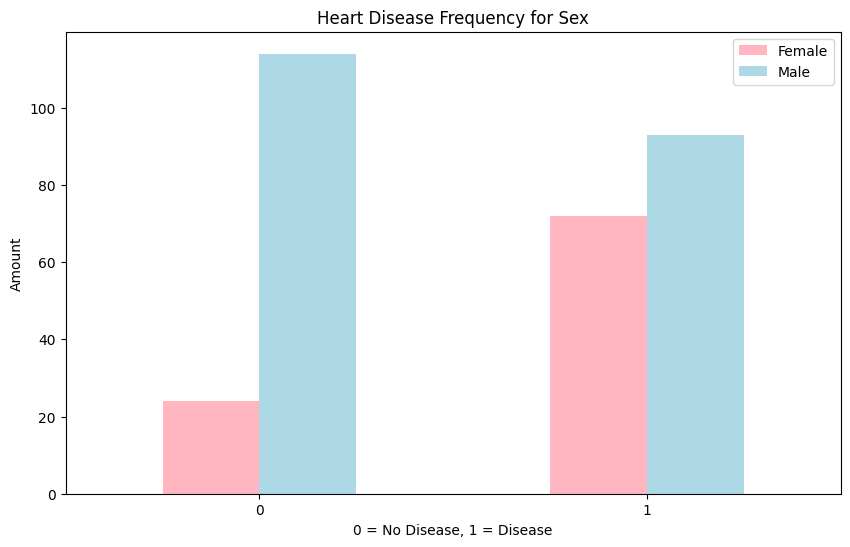

In [20]:
# Create a plot of the comparation
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["lightpink", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Comparing Features:
### Age vs. Max Heart Rate for Heart Disease

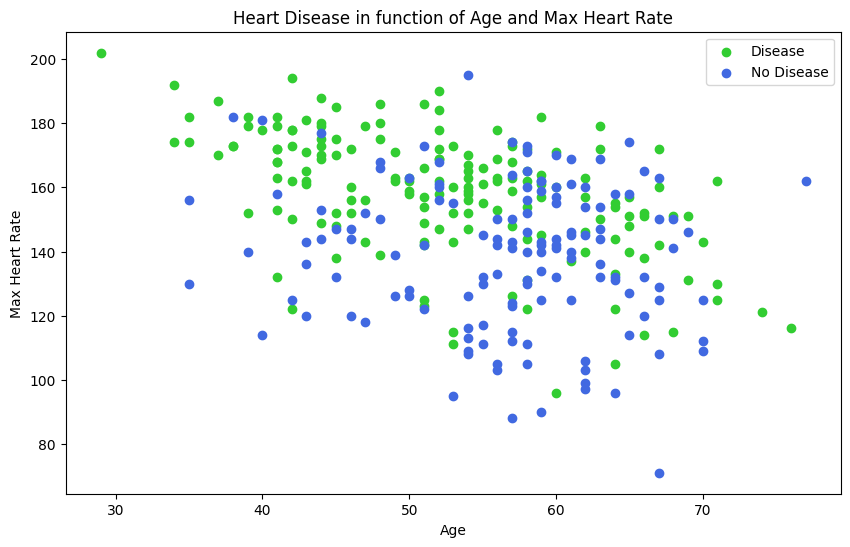

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot - only positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="limegreen");

# Scatter plot - only negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c="royalblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

The younger someone is, the higher their max heart rate (the dots are higher on the left of the graph).

There may be more heart disease in the younger population too (more green dots).

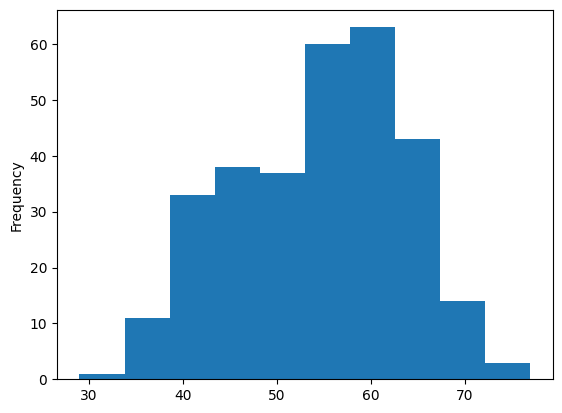

In [36]:
# Distribution of the age column with a histogram

df["age"].plot.hist();

It is a **normal distribution**, but **slightly swaying to the right** - it reflects in the scatter plot above.

### Heart Disease Frequency per Chest Pain type

cp - Chest-pain type: displays the type of chest-pain experienced by the individual
* 0 = Typical angina: chest pain related decrease blood supply to the heart
* 1 = Atypical angina: chest pain not related to heart
* 2 = Non-anginal pain: typically esophageal spasms (non heart related)
* 3 = Asymptomatic: chest pain not showing signs of disease

In [33]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


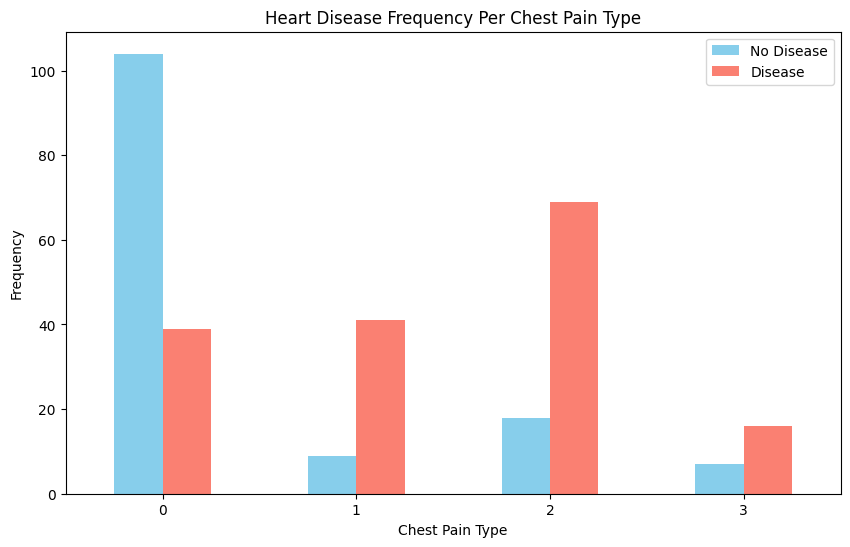

In [35]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                        figsize=(10, 6),
                                        color=["skyblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

It seems atypical angina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

In [37]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


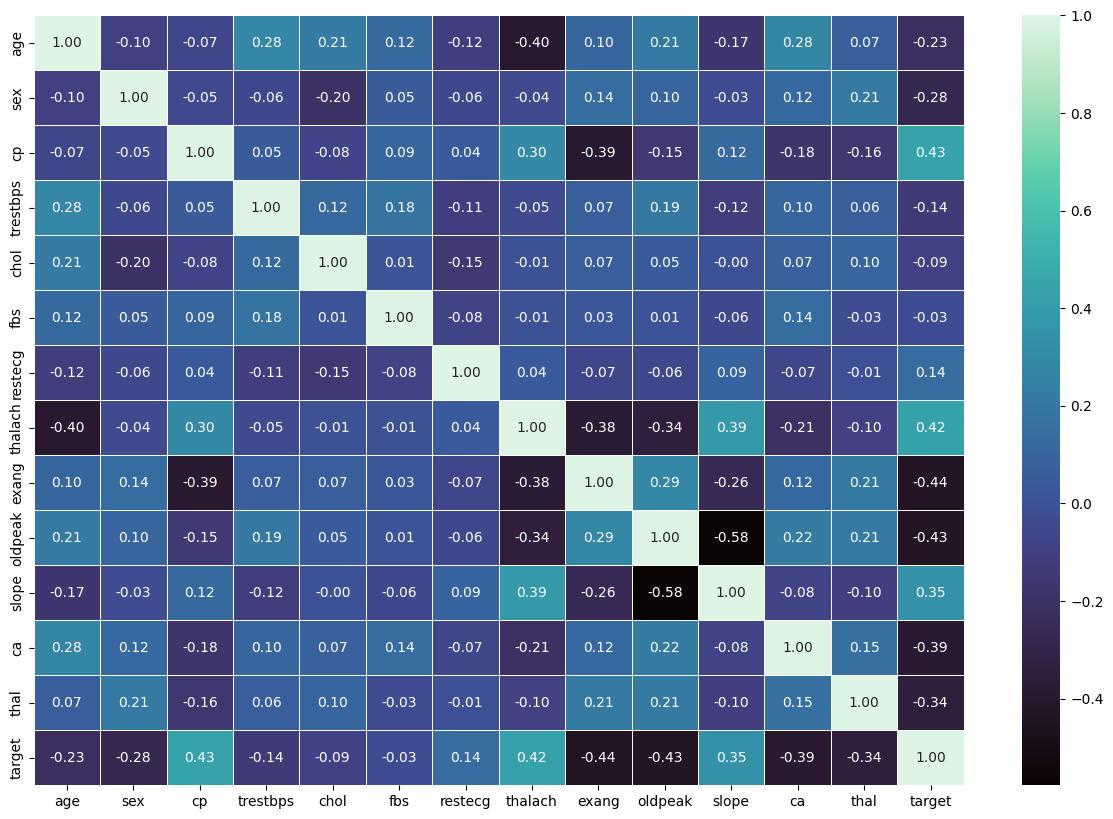

In [46]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="mako");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modelling

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [52]:
# Split the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,)

In [54]:
print(f"Lenght of X_train: {X_train.shape}")
print(f"Lenght of X_test: {X_test.shape}")
print(f"Lenght of y_train: {y_train.shape}")
print(f"Lenght of y_test: {y_test.shape}")

Lenght of X_train: (242, 13)
Lenght of X_test: (61, 13)
Lenght of y_train: (242,)
Lenght of y_test: (61,)


### Choosing a model

Machine Learning Model Map:

https://scikit-learn.org/stable/machine_learning_map.html

Models to be used:

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

In [57]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=100),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dictionary of machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [58]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/opt/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Comparing the model scores visually

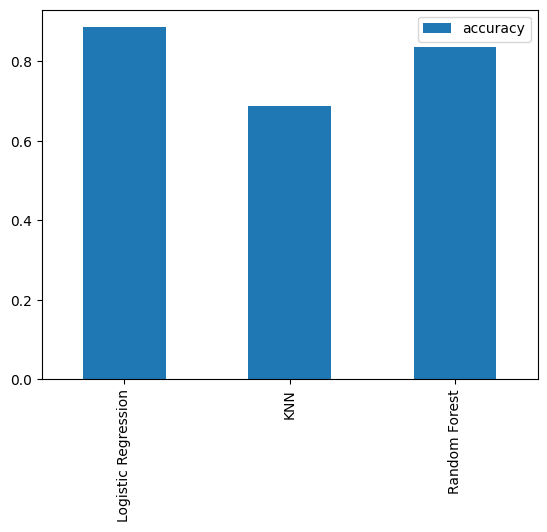

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Tuning / Improving the baseline model(s)

1. Hyperparameters tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

### Hyperparameter tuning - KNN Classifier

In [62]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [63]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [64]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


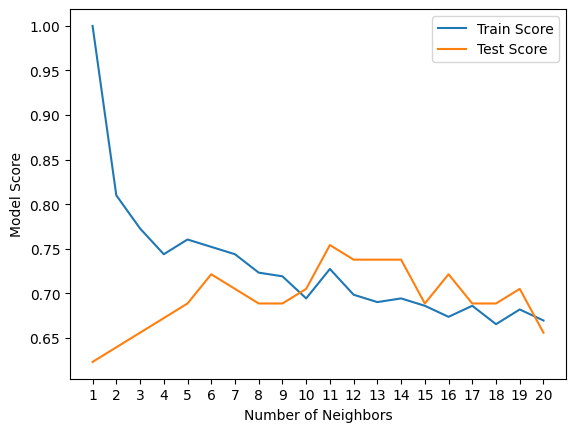

In [67]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

`n_neighbors = 11` seems the best option.

The KNN model's performance didn't get near what Logistic Regression or the Random Forest did.

### Hyperparameter tuning - `RandomizedSearchCV`

Tune:

1. Logistic Regression model.
2. Random Forrest classifier.

Create a hyperparameter grid (a dictionary of different hyperparameters) for each and test them out.

In [68]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [69]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [72]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Hyperparameter tuning - Random Forest Classifier

In [73]:
np.random.seed(42)

# Setup random hyperparameter search for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Random Forest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [74]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [75]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning using `GridSearchCV`

The difference between `RandomizedSearchCV` and `GridSearchCV` is:

* `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations (e.g., it will explore random combinations of the hyperparameters for a defined number of iterations).

* `GridSearchCV` will test every single possible combination of hyperparameters in the grid.

In [76]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [77]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [78]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating the tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [79]:
# Make predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### ROC Curve and AUC Scores

**ROC Curve - Receiver operating characteristic**

The ROC curve is a visual representation of model performance across all thresholds. It's a way of understanding how the model is performing by comparing the true positive rate to the false positive rate.

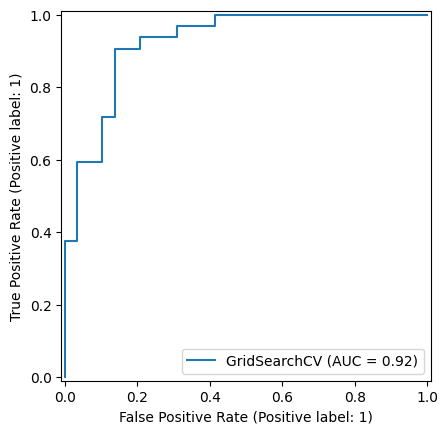

In [81]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);

### Confusion Matrix

A confusion matrix is a simple table that shows how well a classification model is performing by comparing its predictions to the actual results.

It breaks down the predictions into four categories: **correct predictions** for both classes (true positives and true negatives) and **incorrect predictions** (false positives and false negatives). 

In [82]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


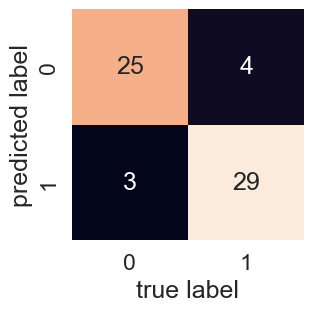

In [83]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

There are 4 occasions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

### Classification Report

It is a collection of different metrics and other details.

`sklearn.metrics.classification_report(y_true, y_pred)` passes the true labels as well as the models predicted labels.

A classification report will also give information on the precision and recall of our model for each class.

In [84]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* **Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* **F1 score**: A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* **Support**: The number of samples each metric was calculated on.

* **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* **Macro avg**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

* **Weighted avg**: Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Calculate evaluation metrics using cross-validation

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels.

It then evaluates the model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined `scoring` parameter.

In [86]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [87]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [88]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there are 5 metrics, we'll take the average.

In [89]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

Now, doing the same for other classification metrics.

In [90]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [91]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [92]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

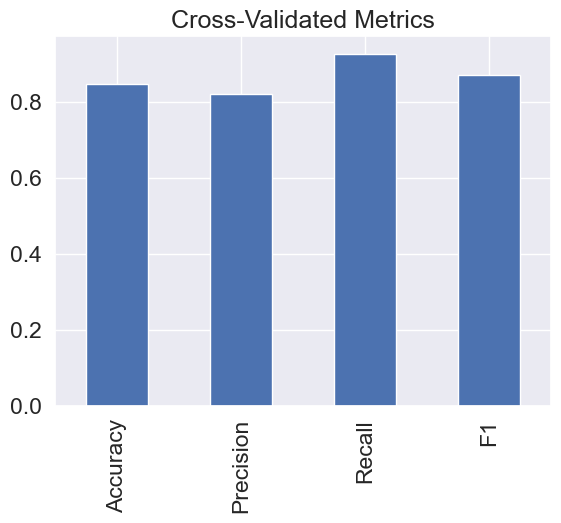

In [93]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

Feature importance is a way to measure how much each variable in a dataset contributes to a machine learning model's predictions.

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

"Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

In [94]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [95]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992183633085857,
 'sex': -0.9042408474114028,
 'cp': 0.6747282820013463,
 'trestbps': -0.01161340415475584,
 'chol': -0.0017036448092066976,
 'fbs': 0.04787689082536315,
 'restecg': 0.33490184455843097,
 'thalach': 0.02472938514033986,
 'exang': -0.6312040052639052,
 'oldpeak': -0.5759090719885068,
 'slope': 0.4709511397091774,
 'ca': -0.6516535119713651,
 'thal': -0.6998419972478845}

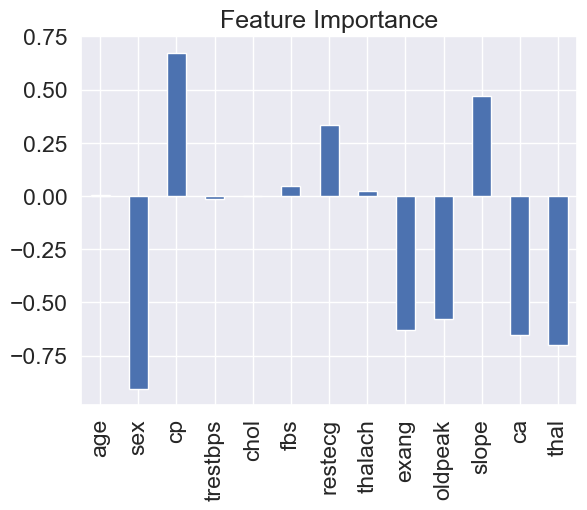

In [96]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

The `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

In [97]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


When `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

It seems the model has found a pattern which reflects the data. If the patient is female, they're more likely to have heart disease.

In [98]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

In this case, we didn't.

The highest accuracy our model achieved was below 90%.

### What's next?

This means we know what doesn't work.

Experimentation comes into its own.

* Could we collect more data? Across more patients with more features? This may take a while but in machine learning, more data is generally better.
* Could we try a better model?
* Could we improve the current models (beyond what we've done so far)?
* If the model is good enough, how would we export it and share it with others?